In [1]:
import numpy as np
import tensorflow as tf

C:\ProgramData\Anaconda3\envs\faceswap\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
def initlize(dim):
    w = np.random.randn(dim,1)*0.01
    b = 0
    return w, b

In [3]:
w,b = initlize(5)

In [9]:
print(tf.nn.relu(10))

Tensor("Relu_3:0", shape=(), dtype=int32)


In [16]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 49s 813us/step - loss: 0.2609 - acc: 0.9198 - val_loss: 0.0623 - val_acc: 0.9791
Epoch 2/12
60000/60000 [==============================] - 44s 725us/step - loss: 0.0891 - acc: 0.9741 - val_loss: 0.0436 - val_acc: 0.9846
Epoch 3/12
60000/60000 [==============================] - 42s 699us/step - loss: 0.0660 - acc: 0.9797 - val_loss: 0.0329 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 42s 695us/step - loss: 0.0533 - acc: 0.9838 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 42s 704us/step - loss: 0.0472 - acc: 0.9861 - val_loss: 0.0304 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 43s 720us/step - loss: 0.0424 - acc: 0.9875 - val_loss: 0.0322 - val_acc: 0.9897
Epoch 7/12
60000/60000 [===================

# 线性回归

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

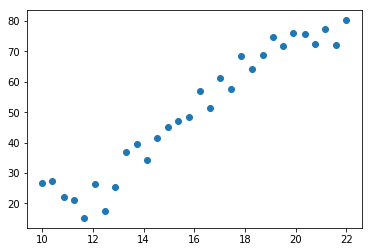

In [15]:
data = pd.read_csv('data/Income1.csv')
x = data.Education
y = data.Income
plt.scatter(x,y)

In [16]:
model = keras.Sequential()

model.add(keras.layers.Dense(1,input_shape=(1,)))
model.compile(optimizer='adam',
              loss='mse'#meansqualerror
)

In [ ]:
history = model.fit(x, y, epochs=1000)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.predict([20])

array([[30.785736]], dtype=float32)

# 多层感知器

In [2]:
data = pd.read_csv('data/Advertising.csv')
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [3]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(3,),activation='relu'),
    keras.layers.Dense(1)]
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
             loss='mse')
model.fit(x,y,epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 4.3521
Epoch 2/100
200/200 [==============================] - 0s 192us/step - loss: 4.0718
Epoch 3/100
200/200 [==============================] - 0s 180us/step - loss: 3.7996
Epoch 4/100
200/200 [==============================] - 0s 218us/step - loss: 3.7035
Epoch 5/100
200/200 [==============================] - 0s 198us/step - loss: 3.6757
Epoch 6/100
200/200 [==============================] - 0s 172us/step - loss: 3.5168
Epoch 7/100
200/200 [==============================] - 0s 270us/step - loss: 3.4800
Epoch 8/100
200/200 [==============================] - 0s 170us/step - loss: 3.4107
Epoch 9/100
200/200 [==============================] - 0s 191us/step - loss: 3.3762
Epoch 10/100
200/200 [==============================] - 0s 181us/step - loss: 3.3556
Epoch 11/100
200/200 [==============================] - 0s 215us/step - loss: 3.3361
Epoch 12/100
200/200 [==============================] - 0s 190us/step - loss

In [7]:
test = data.iloc[:10, 1:-1]
model.predict(test)

array([[22.553308 ],
       [11.790729 ],
       [ 8.702582 ],
       [19.396122 ],
       [12.957434 ],
       [ 7.8257427],
       [10.825126 ],
       [12.048535 ],
       [ 2.2187   ],
       [10.996424 ]], dtype=float32)

# 逻辑回归（以信用卡欺诈为例）

In [8]:
data = pd.read_csv('data/credit-a.csv',header=None)

In [9]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1].replace(-1,0)

In [18]:
y.value_counts()

1    357
0    296
Name: 15, dtype: int64

In [50]:
model = keras.Sequential([
    keras.layers.Dense(110, input_shape=(15,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 110)               1760      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1110      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 2,919
Trainable params: 2,919
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x, y, epochs=10, verbose=1)

Epoch 1/10
653/653 [==============================] - 1s 2ms/step - loss: 6.0032 - acc: 0.5467
Epoch 2/10
653/653 [==============================] - 0s 196us/step - loss: 3.1017 - acc: 0.5743
Epoch 3/10
653/653 [==============================] - 0s 198us/step - loss: 0.6577 - acc: 0.6799
Epoch 4/10
653/653 [==============================] - 0s 216us/step - loss: 0.6540 - acc: 0.6845
Epoch 5/10
653/653 [==============================] - 0s 223us/step - loss: 0.6543 - acc: 0.6753
Epoch 6/10
653/653 [==============================] - 0s 209us/step - loss: 0.6506 - acc: 0.6784
Epoch 7/10
653/653 [==============================] - 0s 172us/step - loss: 0.6452 - acc: 0.6876
Epoch 8/10
653/653 [==============================] - 0s 175us/step - loss: 0.6439 - acc: 0.6861
Epoch 9/10
653/653 [==============================] - 0s 187us/step - loss: 0.6400 - acc: 0.6876
Epoch 10/10
653/653 [==============================] - 0s 201us/step - loss: 0.6390 - acc: 0.6830


In [19]:
history.history.keys()

dict_keys(['loss', 'acc'])

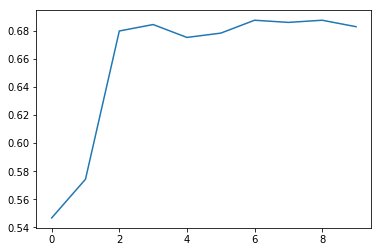

In [39]:
#plt.plot(history.epoch, history.history.get("loss"))
plt.plot(history.epoch, history.history.get("acc"))

In [14]:
model.predict(x[:1])

array([[0.68399346]], dtype=float32)

# 多分类问题：softmax

In [70]:
(train_image, train_lable), (test_image, test_lable) = keras.datasets.fashion_mnist.load_data()

In [71]:
train_lable.shape

(60000,)

In [72]:
train_image = train_image/255
test_image = test_image/255

In [75]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [78]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',#用于连续编码而非one hot编码的情况
             metrics=['acc']
)

In [79]:
model.fit(train_image, train_lable, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 27s 452us/step - loss: 0.5089 - acc: 0.8208
Epoch 2/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.3770 - acc: 0.8646
Epoch 3/100
60000/60000 [==============================] - 12s 192us/step - loss: 0.3394 - acc: 0.8766
Epoch 4/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.3115 - acc: 0.8855
Epoch 5/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.2956 - acc: 0.8914
Epoch 6/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.2813 - acc: 0.8963
Epoch 7/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.2679 - acc: 0.9002
Epoch 8/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.2556 - acc: 0.9049
Epoch 9/100
60000/60000 [==============================] - 12s 194us/step - loss: 0.2473 - acc: 0.9076
Epoch 10/100
60000/60000 [==============================] - 12s 204us/ste

In [100]:
a=1
hex(id(a)) = 0x617fb0e1
a

SyntaxError: can't assign to function call (<ipython-input-100-e606d97f7b7b>, line 2)

In [80]:
model.evaluate(test_image, test_lable)

10000/10000 [==============================] - 11s 1ms/step


[0.6688303276136518, 0.8851]

## one-hot encode

In [81]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
             loss='categorical_crossentropy',#用于连续编码而非one hot编码的情况
             metrics=['acc']
)

In [85]:
train_lable_onehot = keras.utils.to_categorical(train_lable)

In [86]:
history = model.fit(train_image, train_lable_onehot, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 49s 813us/step - loss: 0.4963 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 32s 531us/step - loss: 0.3735 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 30s 505us/step - loss: 0.3372 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 26s 431us/step - loss: 0.3130 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 25s 421us/step - loss: 0.2975 - acc: 0.8907


In [ ]:
plt.plot()

In [ ]:
tf.